In [7]:
import numpy as np

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity


In [8]:
import qiskit.tools.jupyter
%qiskit_version_table

量子隐形传态

In [9]:
# 量子隐形传态 线路 ,q0,q1 bell state, q2 is unkonwn state which is transmitted to qubit 0
theta = 0.5

qr = QuantumRegister(3)
bob_bell_cr = ClassicalRegister(1)
alice_bell_cr = ClassicalRegister(1)
alice_psi_cr = ClassicalRegister(1)
qte = QuantumCircuit(qr)
qte.add_register(bob_bell_cr)
qte.add_register(alice_bell_cr)
qte.add_register(alice_psi_cr)

qte.h(1)
qte.cx(1, 0)

# q2 applies ry, has a parameter theta

qte.ry(theta, 2)

# q2 is transmitted to q0
qte.cx(2, 1)
qte.h(2)

# q2 measurement store in alice_psi_cr，q1 measurement store in alice_bell_cr 
qte.measure(qr[2], alice_psi_cr)
qte.measure(qr[1], alice_bell_cr)

#  c_if by q1 q2
qte.x(0).c_if(alice_bell_cr, 1)
qte.z(0).c_if(alice_psi_cr, 1)

# # # q0 measurement store in bob_bell_cr
# qte.measure(0, bob_bell_cr)


# backend = Aer.get_backend('aer_simulator')
# job = backend.run(qte)
# result = job.result()

# # get counts
# counts = result.get_counts(qte)
# print(counts)


# qte.draw(output='mpl')

# using statevector simulator
backend = Aer.get_backend('statevector_simulator')
job = backend.run(qte)
result = job.result()

# get statevector
statevector = result.get_statevector(qte)
print(statevector)

# statevector to array
statevector = np.array(statevector)

# 得到statevector的模的平方
statevector = np.abs(statevector)**2 # abs()求模，**2求平方

print(statevector)

# 分别得到statevector的奇数项的和，偶数项的和
odd = statevector[1::2]  # 从第1个元素开始，每隔2个取一个
# 求和 
odd = np.sum(odd)

even = statevector[::2]  #  从第0个元素开始，每隔2个取一个

even = np.sum(even)

# 得到概率，q0为0的概率是even，q0为1的概率是odd
print('q0为0的概率是',even)
print('q0为1的概率是',odd)

print([even,odd])


Statevector([ 0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
              0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
              0.96891242+0.00000000e+00j,  0.24740396-3.02982467e-17j,
             -0.        +0.00000000e+00j, -0.        +0.00000000e+00j],
            dims=(2, 2, 2))
[0.         0.         0.         0.         0.93879128 0.06120872
 0.         0.        ]
q0为0的概率是 0.9387912809451863
q0为1的概率是 0.06120871905481365
[0.9387912809451863, 0.06120871905481365]


In [10]:
# 输入态 0，1的概率     ( cos(theta/2)I - isin(theta/2)Y ) |0>
print('输入态 0,1的概率',np.cos(theta/2)**2,np.sin(theta/2)**2)

# # cos(1/4)**2
# print(np.cos(theta/2)**2)

# # sin(1/4)**2
# print(np.sin(theta/2)**2)

输入态 0,1的概率 0.9387912809451863 0.06120871905481365


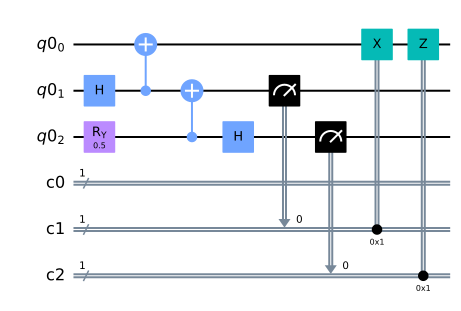

In [11]:
qte.draw(output='mpl')

# 第二题

In [4]:
# numpy 解线性方程组
import numpy as np


a = np.array([[1,1],[1/np.sqrt(2),-1/np.sqrt(2)]])
b = np.array([[1/2],[-1/np.sqrt(2)]])
x = np.linalg.solve(a, b)
print(x)
print(np.allclose(np.dot(a, x), b))

[[-0.25]
 [ 0.75]]
True
